In [46]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from bokeh.plotting import figure, output_notebook, show
from scipy.integrate import odeint

In [47]:
Philippines_MM = pd.read_csv(r'Philippines_MM.csv')
Afghanistan_MM = pd.read_csv(r'Afghanistan_MM.csv')
Venezuela_MM = pd.read_csv(r'Venezuela_MM.csv')
Philippines_MM

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,1/3/2020,PH,Philippines,WPRO,0,0,0,0
1,1/4/2020,PH,Philippines,WPRO,0,0,0,0
2,1/5/2020,PH,Philippines,WPRO,0,0,0,0
3,1/6/2020,PH,Philippines,WPRO,0,0,0,0
4,1/7/2020,PH,Philippines,WPRO,0,0,0,0
...,...,...,...,...,...,...,...,...
622,9/16/2021,PH,Philippines,WPRO,16909,2282931,213,35742
623,9/17/2021,PH,Philippines,WPRO,21208,2304139,276,36018
624,9/18/2021,PH,Philippines,WPRO,20277,2324416,310,36328
625,9/19/2021,PH,Philippines,WPRO,23062,2347478,255,36583


In [48]:
Afghanistan_MM.head(92)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,1/3/2020,AF,Afghanistan,EMRO,0,0,0,0
1,1/4/2020,AF,Afghanistan,EMRO,0,0,0,0
2,1/5/2020,AF,Afghanistan,EMRO,0,0,0,0
3,1/6/2020,AF,Afghanistan,EMRO,0,0,0,0
4,1/7/2020,AF,Afghanistan,EMRO,0,0,0,0
...,...,...,...,...,...,...,...,...
87,3/30/2020,AF,Afghanistan,EMRO,0,114,0,4
88,3/31/2020,AF,Afghanistan,EMRO,52,166,0,4
89,4/1/2020,AF,Afghanistan,EMRO,26,192,0,4
90,4/2/2020,AF,Afghanistan,EMRO,43,235,0,4


In [49]:
Venezuela_MM.head(92)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,1/3/2020,VE,Venezuela (Bolivarian Republic of),AMRO,0,0,0,0
1,1/4/2020,VE,Venezuela (Bolivarian Republic of),AMRO,0,0,0,0
2,1/5/2020,VE,Venezuela (Bolivarian Republic of),AMRO,0,0,0,0
3,1/6/2020,VE,Venezuela (Bolivarian Republic of),AMRO,0,0,0,0
4,1/7/2020,VE,Venezuela (Bolivarian Republic of),AMRO,0,0,0,0
...,...,...,...,...,...,...,...,...
87,3/30/2020,VE,Venezuela (Bolivarian Republic of),AMRO,0,113,0,2
88,3/31/2020,VE,Venezuela (Bolivarian Republic of),AMRO,16,129,1,3
89,4/1/2020,VE,Venezuela (Bolivarian Republic of),AMRO,0,129,0,3
90,4/2/2020,VE,Venezuela (Bolivarian Republic of),AMRO,14,143,0,3


In [50]:
Philippines_MM_scaled = Philippines_MM['Cumulative_cases']/84167090
Afghanistan_MM_scaled = Afghanistan_MM['Cumulative_cases']/10351401
Venezuela_MM_scaled = Venezuela_MM['Cumulative_cases']/125929581
Philippines_MM_scaled = pd.DataFrame(Philippines_MM_scaled)
Afghanistan_MM_scaled = pd.DataFrame(Afghanistan_MM_scaled)
Venezuela_MM_scaled = pd.DataFrame(Venezuela_MM_scaled)

In [51]:
Philippines_MM = pd.concat([Philippines_MM['Date_reported'], Philippines_MM_scaled], axis=1)
Philippines_MM.rename(columns = {'Cumulative_cases':'Philippines_CC'}, inplace = True)
Afghanistan_MM = pd.concat([Afghanistan_MM['Date_reported'], Afghanistan_MM_scaled], axis=1)
Afghanistan_MM.rename(columns = {'Cumulative_cases':'Afghanistan_CC'}, inplace = True)
Afghanistan_MM_1 = Afghanistan_MM.drop(['Date_reported'], axis = 1)
Venezuela_MM = pd.concat([Venezuela_MM['Date_reported'], Venezuela_MM_scaled], axis=1)
Venezuela_MM.rename(columns = {'Cumulative_cases':'Venezuela_CC'}, inplace = True)
Venezuela_MM_1=Venezuela_MM.drop(['Date_reported'], axis = 1)
Cumulative_cases_3C = pd.concat([Philippines_MM,Afghanistan_MM_1,Venezuela_MM_1], axis=1)
Cumulative_cases_3C=pd.DataFrame(Cumulative_cases_3C)
Cumulative_cases_3C = Cumulative_cases_3C.assign(Days=lambda x: x.index+1)
Cumulative_cases_3C = Cumulative_cases_3C.loc[Cumulative_cases_3C['Days'] > 100]
Cumulative_cases_3C


,Date_reported,Philippines_CC,Afghanistan_CC,Venezuela_CC,Days
100,4/12/2020,0.000053,0.000054,0.000001,101
101,4/13/2020,0.000055,0.000059,0.000001,102
102,4/14/2020,0.000059,0.000064,0.000001,103
103,4/15/2020,0.000062,0.000074,0.000001,104
104,4/16/2020,0.000065,0.000077,0.000002,105
...,...,...,...,...,...
622,9/16/2021,0.027124,0.014912,0.002777,623
623,9/17/2021,0.027376,0.014924,0.002786,624
624,9/18/2021,0.027617,0.014929,0.002796,625
625,9/19/2021,0.027891,0.014929,0.002806,626


In [52]:
fig = figure(plot_width=600,plot_height=400)
fig.line(Cumulative_cases_3C['Days'], Cumulative_cases_3C['Philippines_CC'], legend="Philippines", line_color="orange")
fig.line(Cumulative_cases_3C['Days'], Cumulative_cases_3C['Afghanistan_CC'], legend="Afghanistan", line_color="purple")
fig.line(Cumulative_cases_3C['Days'], Cumulative_cases_3C['Venezuela_CC'], legend="Venezuela", line_color="red")
fig.legend.location = 'top_left'
fig.xaxis.axis_label = "Days From Begining"
fig.yaxis.axis_label = "Normalised Cumulative Cases"
show(fig)

In [53]:
Cumulative_cases_3C['Philippines_CC_log'] = np.log(Cumulative_cases_3C['Philippines_CC'])
Cumulative_cases_3C['Afghanistan_CC_log'] = np.log(Cumulative_cases_3C['Afghanistan_CC'])
Cumulative_cases_3C['Venezuela_CC_log'] = np.log(Cumulative_cases_3C['Venezuela_CC'])
Cumulative_cases_3C

,Date_reported,Philippines_CC,Afghanistan_CC,Venezuela_CC,Days,Philippines_CC_log,Afghanistan_CC_log,Venezuela_CC_log
100,4/12/2020,0.000053,0.000054,0.000001,101,-9.852611,-9.833664,-13.509570
101,4/13/2020,0.000055,0.000059,0.000001,102,-9.804122,-9.744104,-13.509570
102,4/14/2020,0.000059,0.000064,0.000001,103,-9.744815,-9.652845,-13.452736
103,4/15/2020,0.000062,0.000074,0.000001,104,-9.687487,-9.506242,-13.452736
104,4/16/2020,0.000065,0.000077,0.000002,105,-9.644393,-9.475549,-13.388543
...,...,...,...,...,...,...,...,...
622,9/16/2021,0.027124,0.014912,0.002777,623,-3.607344,-4.205583,-5.886314
623,9/17/2021,0.027376,0.014924,0.002786,624,-3.598097,-4.204767,-5.883276
624,9/18/2021,0.027617,0.014929,0.002796,625,-3.589335,-4.204476,-5.879691
625,9/19/2021,0.027891,0.014929,0.002806,626,-3.579462,-4.204431,-5.875875


In [54]:
# import modules
from bokeh.plotting import figure, output_notebook, show
from bokeh.layouts import row
# output to notebook
output_notebook()
  
# create figure
p = figure(plot_width = 800, plot_height = 400)

   
# add a line renderer

p.line(Cumulative_cases_3C['Days'], Cumulative_cases_3C['Philippines_CC_log'], legend="Germany", line_color="orange")
p.xaxis.axis_label = "Days From Begining"
p.yaxis.axis_label = "Normalised Cumulative Cases"
p.legend.location = 'top_left'


# show the results
show(p)

Loading BokehJS ...

In [55]:
p = figure(plot_width = 800, plot_height = 400)
p.line(Cumulative_cases_3C['Days'], Cumulative_cases_3C['Afghanistan_CC_log'], legend="Greece", line_color="purple")
p.xaxis.axis_label = "Days From Begining"
p.yaxis.axis_label = "Normalised Cumulative Cases"
p.legend.location = 'top_left'

# show the results
show(p)

In [56]:
p = figure(plot_width = 800, plot_height = 400)
p.line(Cumulative_cases_3C['Days'], Cumulative_cases_3C['Venezuela_CC_log'], legend="Japan", line_color="purple")
p.xaxis.axis_label = "Days From Begining"
p.yaxis.axis_label = "Normalised Cumulative Cases"
p.legend.location = 'top_left'

# show the results
show(p)

In [57]:
v_w_1 = Cumulative_cases_3C[(Cumulative_cases_3C["Days"] >= 100) & (Cumulative_cases_3C["Days"] <= 120)]
v_w_2 = Cumulative_cases_3C[(Cumulative_cases_3C["Days"] >= 120) & (Cumulative_cases_3C["Days"] <= 200)]
v_w_3 = Cumulative_cases_3C[(Cumulative_cases_3C["Days"] >= 200) & (Cumulative_cases_3C["Days"] <= 260)]
v_w_4 = Cumulative_cases_3C[(Cumulative_cases_3C["Days"] >= 100) & (Cumulative_cases_3C["Days"] <= 260)]

In [58]:
P_w_1 = Cumulative_cases_3C[(Cumulative_cases_3C["Days"] >= 100) & (Cumulative_cases_3C["Days"] <= 160)]
P_w_2 = Cumulative_cases_3C[(Cumulative_cases_3C["Days"] >= 160) & (Cumulative_cases_3C["Days"] <= 200)]
P_w_3 = Cumulative_cases_3C[(Cumulative_cases_3C["Days"] >= 100) & (Cumulative_cases_3C["Days"] <= 200)]

In [59]:
A_w_1 = Cumulative_cases_3C[(Cumulative_cases_3C["Days"] >= 100) & (Cumulative_cases_3C["Days"] <= 120)]
A_w_2 = Cumulative_cases_3C[(Cumulative_cases_3C["Days"] >= 120) & (Cumulative_cases_3C["Days"] <= 160)]
A_w_3 = Cumulative_cases_3C[(Cumulative_cases_3C["Days"] >= 100) & (Cumulative_cases_3C["Days"] <= 160)]

In [60]:
xv1 = v_w_1['Days']
yv1 = v_w_1['Venezuela_CC_log']
yvv1 = v_w_1['Venezuela_CC']
z,cov = np.polyfit(xv1,yv1,1,cov=True)
v1_slope1 = z[0]
v1_intercept1 = z[1]
print (v1_slope1, v1_intercept1)

0.0421284025988497 -17.789955142442448


In [61]:
xv2 = v_w_2['Days']
yv2 = v_w_2['Venezuela_CC_log']
yvv2 = v_w_2['Venezuela_CC']
z,cov = np.polyfit(xv2,yv2,1,cov=True)
v2_slope1 = z[0]
v2_intercept1 = z[1]
print (v2_slope1, v2_intercept1)

0.04800517558106437 -18.71656161049299


In [62]:
xv3 = v_w_3['Days']
yv3 = v_w_3['Venezuela_CC_log']
yvv3 = v_w_3['Venezuela_CC']
z,cov = np.polyfit(xv3,yv3,1,cov=True)
v3_slope1 = z[0]
v3_intercept1 = z[1]
print (v3_slope1, v3_intercept1)

0.02896050660016554 -14.97569520726842


In [63]:
xv4 = v_w_4['Days']
yv4 = v_w_4['Venezuela_CC_log']
yvv4 = v_w_4['Venezuela_CC']
z,cov = np.polyfit(xv4,yv4,1,cov=True)
v4_slope1 = z[0]
v4_intercept1 = z[1]
print (v4_slope1, v4_intercept1)

0.04017459204505269 -17.51176088005371


In [64]:
xp1 = P_w_1['Days']
yp1 = P_w_1['Philippines_CC_log']
ypp1 = P_w_1['Philippines_CC']
z,cov = np.polyfit(xp1,yp1,1,cov=True)
p1_slope1 = z[0]
p1_intercept1 = z[1]
print (p1_slope1, p1_intercept1)

0.025412973001086293 -12.29038955469825


In [65]:
xp2 = P_w_2['Days']
yp2 = P_w_2['Philippines_CC_log']
ypp2 = P_w_2['Philippines_CC']
z,cov = np.polyfit(xp2,yp2,1,cov=True)
p2_slope1 = z[0]
p2_intercept1 = z[1]
print (p2_slope1, p2_intercept1)

0.027265353635654434 -12.610977907716533


In [66]:
xp3 = P_w_3['Days']
yp3 = P_w_3['Philippines_CC_log']
ypp3 = P_w_3['Philippines_CC']
z,cov = np.polyfit(xp3,yp3,1,cov=True)
p3_slope1 = z[0]
p3_intercept1 = z[1]
print (p3_slope1, p3_intercept1)

0.02572480355535928 -12.332244596374116


In [67]:
xa1 = A_w_1['Days']
ya1 = A_w_1['Afghanistan_CC_log']
yaa1 = A_w_1['Afghanistan_CC']
z,cov = np.polyfit(xa1,ya1,1,cov=True)
a1_slope1 = z[0]
a1_intercept1 = z[1]
print (a1_slope1, a1_intercept1)

0.06532866047336137 -16.37580577343387


In [68]:
xa2 = A_w_2['Days']
ya2 = A_w_2['Afghanistan_CC_log']
yaa2 = A_w_2['Afghanistan_CC']
z,cov = np.polyfit(xa2,ya2,1,cov=True)
a2_slope1 = z[0]
a2_intercept1 = z[1]
print (a2_slope1, a2_intercept1)

0.06019478020924595 -15.589809766988544


In [69]:
xa3 = A_w_3['Days']
ya3 = A_w_3['Afghanistan_CC_log']
yaa2 = A_w_3['Afghanistan_CC']
z,cov = np.polyfit(xa3,ya3,1,cov=True)
a3_slope1 = z[0]
a3_intercept1 = z[1]
print (a3_slope1, a3_intercept1)

0.06518565364795469 -16.312298611175617


In [70]:
b=0.1
a_v1 = v1_slope1 + b
a_v2 = v2_slope1 + b
a_v3 = v3_slope1 + b
a_v4 = v4_slope1 + b
a_p1 = p1_slope1 + b
a_p2 = p2_slope1 + b
a_p3 = p3_slope1 + b
a_a1 = a1_slope1 + b
a_a2 = a2_slope1 + b
a_a3 = a3_slope1 + b
print("a_values for Venezuela:",a_v1, a_v2 , a_v3, a_v4)
print("a_values for Philippines:",a_p1, a_p2 , a_p3)
print("a_values for Afghanistan:",a_a1, a_a2,a_a3 )

a_values for Venezuela: 0.1421284025988497 0.14800517558106438 0.12896050660016556 0.1401745920450527
a_values for Philippines: 0.1254129730010863 0.12726535363565444 0.12572480355535928
a_values for Afghanistan: 0.16532866047336137 0.16019478020924596 0.16518565364795468


In [71]:
venezuela = 2556
Philippines = 73522
Afghanistan = 1415

In [72]:
k2 = 1
k3 = 1/50
k6 = 1/100

I(A3):  3.370294207522218e-05
R(A3):  2.0297057924777817e-05
Sign(A3):  0.999946
Sres(A3):  0


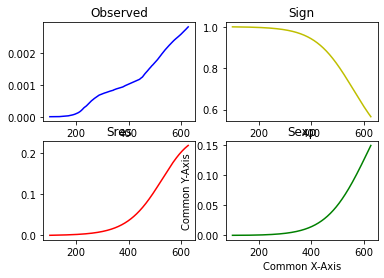

In [73]:
R0_v1 = venezuela / 125929581
I0_v1 = 0.000054 - R0_v1
S0_v1 = 1 - I0_v1 - R0_v1
S0res1 = 0
#S0exh23 = 1-S0_aa3-S0res23-I0_aa3-R0_aa3
print ("I(A3): ", I0_v1)
print ("R(A3): ", R0_v1)
print ("Sign(A3): ", S0_v1)
print ("Sres(A3): ", S0res1)
#print ("Sexh(A3): ", S0exh23)
def deriv(yv1,t,b, a_v1,k2,k3,k6):
    #Signa3,Sresa3,Sexha3,Ia3,Ra3 = ya3
    S0_v1,S0res1,I0_v1,R0_v1 = yv1

    Sexhv1 = 1 -yv1[0]-yv1[1]-yv1[2]-yv1[3]
    dSigndt = -(a_v1*yv1[0]*yv1[2])-(k2*yv1[0]*yv1[2])+(k6*Sexhv1)
    dIdt = (a_v1*yv1[0]*yv1[2])+(a_v1*Sexhv1*yv1[2])-(b*yv1[2])
    dRdt = b*yv1[2]
    dSresdt = (k2*yv1[0]*(yv1[2]))-(k3*yv1[1])
    #dSexhdt = (k3*S0res23)-(a_a3*S0exh23*ia3)-(k6*S0exh23)
    return [dSigndt, dSresdt, dIdt,dRdt]
t = np.linspace(0, 180, 527)
x_initial = S0_v1,S0res1,I0_v1, R0_v1
solv1 = odeint(deriv, x_initial, t, args=(b, a_v1,k2,k3,k6))
Signv1,Sresv1,Iv1,Rv1 = solv1.T
dv11 = pd.DataFrame(Signv1)
dv12 = pd.DataFrame(Sresv1)
dv14 = pd.DataFrame(Iv1)
dv15 = pd.DataFrame(Rv1)
Venezuela_w1 = pd.concat([dv11, dv12,dv14,dv15], axis=1)
Venezuela_w1.columns = ['Sign','Sres','I','R']
Venezuela_w1
figure, axes = plt.subplots(nrows=2, ncols=2)

axes[0, 0].plot(Cumulative_cases_3C['Days'], Cumulative_cases_3C['Venezuela_CC'],color='b')

axes[0, 1].plot(Cumulative_cases_3C['Days'], Signv1,color='y')
axes[1, 0].plot(Cumulative_cases_3C['Days'], Sresv1,color='r')
axes[1, 1].plot(Cumulative_cases_3C['Days'],1 -Signv1-Sresv1-Iv1-Rv1,color='g')
plt.xlabel("Common X-Axis")
plt.ylabel("Common Y-Axis")
axes[0, 0].title.set_text("Observed")
axes[0, 1].title.set_text("Sign")
axes[1, 0].title.set_text("Sres")
axes[1, 1].title.set_text("Sexp")


I(A3):  9.270294207522218e-05
R(A3):  2.0297057924777817e-05
Sign(A3):  0.9998870000000001
Sres(A3):  0


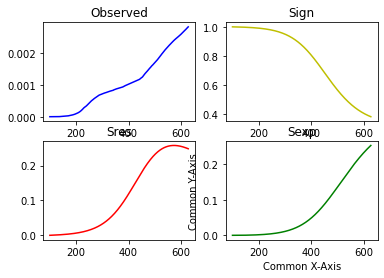

In [74]:
R0_v2 = venezuela / 125929581
I0_v2 = 0.000113 - R0_v2
S0_v2 = 1 - I0_v2 - R0_v2
S0res2 = 0
#S0exh23 = 1-S0_aa3-S0res23-I0_aa3-R0_aa3
print ("I(A3): ", I0_v2)
print ("R(A3): ", R0_v2)
print ("Sign(A3): ", S0_v2)
print ("Sres(A3): ", S0res2)
#print ("Sexh(A3): ", S0exh23)
def deriv(yv2,t,b, a_v2,k2,k3,k6):
    #Signa3,Sresa3,Sexha3,Ia3,Ra3 = ya3
    S0_v2,S0res2,I0_v2,R0_v2 = yv2

    Sexhv2 = 1 -yv2[0]-yv2[1]-yv2[2]-yv2[3]
    dSigndt = -(a_v2*yv2[0]*yv2[2])-(k2*yv2[0]*yv2[2])+(k6*Sexhv2)
    dIdt = (a_v2*yv2[0]*yv2[2])+(a_v2*Sexhv2*yv2[2])-(b*yv2[2])
    dRdt = b*yv2[2]
    dSresdt = (k2*yv2[0]*(yv2[2]))-(k3*yv2[1])
    #dSexhdt = (k3*S0res23)-(a_a3*S0exh23*ia3)-(k6*S0exh23)
    return [dSigndt, dSresdt, dIdt,dRdt]
t = np.linspace(0, 180, 527)
x_initial = S0_v2,S0res2,I0_v2, R0_v2
solv2 = odeint(deriv, x_initial, t, args=(b, a_v2,k2,k3,k6))
Signv2,Sresv2,Iv2,Rv2 = solv2.T
dv21 = pd.DataFrame(Signv2)
dv22 = pd.DataFrame(Sresv2)
dv24 = pd.DataFrame(Iv2)
dv25 = pd.DataFrame(Rv2)
Venezuela_w2 = pd.concat([dv21, dv22,dv24,dv25], axis=1)
Venezuela_w2.columns = ['Sign','Sres','I','R']
Venezuela_w2
figure, axes = plt.subplots(nrows=2, ncols=2)

axes[0, 0].plot(Cumulative_cases_3C['Days'], Cumulative_cases_3C['Venezuela_CC'],color='b')

axes[0, 1].plot(Cumulative_cases_3C['Days'], Signv2,color='y')
axes[1, 0].plot(Cumulative_cases_3C['Days'], Sresv2,color='r')
axes[1, 1].plot(Cumulative_cases_3C['Days'],1 -Signv2-Sresv2-Iv2-Rv2,color='g')
plt.xlabel("Common X-Axis")
plt.ylabel("Common Y-Axis")
axes[0, 0].title.set_text("Observed")
axes[0, 1].title.set_text("Sign")
axes[1, 0].title.set_text("Sres")
axes[1, 1].title.set_text("Sexp")


I(A3):  0.0001787029420752222
R(A3):  2.0297057924777817e-05
Sign(A3):  0.999801
Sres(A3):  0


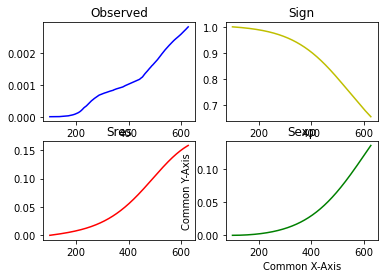

In [75]:
R0_v3 = venezuela / 125929581
I0_v3 = 0.000199 - R0_v3
S0_v3 = 1 - I0_v3 - R0_v3
S0res3 = 0
#S0exh23 = 1-S0_aa3-S0res23-I0_aa3-R0_aa3
print ("I(A3): ", I0_v3)
print ("R(A3): ", R0_v3)
print ("Sign(A3): ", S0_v3)
print ("Sres(A3): ", S0res3)
#print ("Sexh(A3): ", S0exh23)
def deriv(yv3,t,b, a_v3,k2,k3,k6):
    #Signa3,Sresa3,Sexha3,Ia3,Ra3 = ya3
    S0_v3,S0res3,I0_v3,R0_v3 = yv3

    Sexhv3 = 1 -yv3[0]-yv3[1]-yv3[2]-yv3[3]
    dSigndt = -(a_v3*yv3[0]*yv3[2])-(k2*yv3[0]*yv3[2])+(k6*Sexhv3)
    dIdt = (a_v3*yv3[0]*yv3[2])+(a_v3*Sexhv3*yv3[2])-(b*yv3[2])
    dRdt = b*yv3[2]
    dSresdt = (k2*yv3[0]*(yv3[2]))-(k3*yv3[1])
    #dSexhdt = (k3*S0res23)-(a_a3*S0exh23*ia3)-(k6*S0exh23)
    return [dSigndt, dSresdt, dIdt,dRdt]
t = np.linspace(0, 180, 527)
x_initial = S0_v3,S0res3,I0_v3, R0_v3
solv3 = odeint(deriv, x_initial, t, args=(b, a_v3,k2,k3,k6))
Signv3,Sresv3,Iv3,Rv3 = solv3.T
dv31 = pd.DataFrame(Signv3)
dv32 = pd.DataFrame(Sresv3)
dv34 = pd.DataFrame(Iv3)
dv35 = pd.DataFrame(Rv3)
Venezuela_w3 = pd.concat([dv31, dv32,dv34,dv35], axis=1)
Venezuela_w3.columns = ['Sign','Sres','I','R']
Venezuela_w3
figure, axes = plt.subplots(nrows=2, ncols=2)

axes[0, 0].plot(Cumulative_cases_3C['Days'], Cumulative_cases_3C['Venezuela_CC'],color='b')

axes[0, 1].plot(Cumulative_cases_3C['Days'], Signv3,color='y')
axes[1, 0].plot(Cumulative_cases_3C['Days'], Sresv3,color='r')
axes[1, 1].plot(Cumulative_cases_3C['Days'],1 -Signv3-Sresv3-Iv3-Rv3,color='g')
plt.xlabel("Common X-Axis")
plt.ylabel("Common Y-Axis")
axes[0, 0].title.set_text("Observed")
axes[0, 1].title.set_text("Sign")
axes[1, 0].title.set_text("Sres")
axes[1, 1].title.set_text("Sexp")


I(A3):  3.370294207522218e-05
R(A3):  2.0297057924777817e-05
Sign(A3):  0.999946
Sres(A3):  0


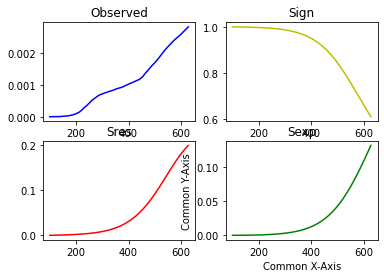

In [76]:
R0_v4 = venezuela / 125929581
I0_v4 = 0.000054 - R0_v4
S0_v4 = 1 - I0_v4 - R0_v4
S0res4 = 0
#S0exh23 = 1-S0_aa3-S0res23-I0_aa3-R0_aa3
print ("I(A3): ", I0_v4)
print ("R(A3): ", R0_v4)
print ("Sign(A3): ", S0_v4)
print ("Sres(A3): ", S0res4)
#print ("Sexh(A3): ", S0exh23)
def deriv(yv4,t,b, a_v4,k2,k3,k6):
    #Signa3,Sresa3,Sexha3,Ia3,Ra3 = ya3
    S0_v4,S0res4,I0_v4,R0_v4 = yv4

    Sexhv4 = 1 -yv4[0]-yv4[1]-yv4[2]-yv4[3]
    dSigndt = -(a_v4*yv4[0]*yv4[2])-(k2*yv4[0]*yv4[2])+(k6*Sexhv4)
    dIdt = (a_v4*yv4[0]*yv4[2])+(a_v4*Sexhv4*yv4[2])-(b*yv4[2])
    dRdt = b*yv4[2]
    dSresdt = (k2*yv4[0]*(yv4[2]))-(k3*yv4[1])
    #dSexhdt = (k3*S0res23)-(a_a3*S0exh23*ia3)-(k6*S0exh23)
    return [dSigndt, dSresdt, dIdt,dRdt]
t = np.linspace(0, 180, 527)
x_initial = S0_v4,S0res4,I0_v4, R0_v4
solv4 = odeint(deriv, x_initial, t, args=(b, a_v4,k2,k3,k6))
Signv4,Sresv4,Iv4,Rv4 = solv4.T
dv41 = pd.DataFrame(Signv4)
dv42 = pd.DataFrame(Sresv4)
dv44 = pd.DataFrame(Iv4)
dv45 = pd.DataFrame(Rv4)
Venezuela_w4 = pd.concat([dv41, dv42,dv44,dv45], axis=1)
Venezuela_w4.columns = ['Sign','Sres','I','R']
Venezuela_w4
figure, axes = plt.subplots(nrows=2, ncols=2)

axes[0, 0].plot(Cumulative_cases_3C['Days'], Cumulative_cases_3C['Venezuela_CC'],color='b')

axes[0, 1].plot(Cumulative_cases_3C['Days'], Signv4,color='y')
axes[1, 0].plot(Cumulative_cases_3C['Days'], Sresv4,color='r')
axes[1, 1].plot(Cumulative_cases_3C['Days'],1 -Signv4-Sresv4-Iv4-Rv4,color='g')
plt.xlabel("Common X-Axis")
plt.ylabel("Common Y-Axis")
axes[0, 0].title.set_text("Observed")
axes[0, 1].title.set_text("Sign")
axes[1, 0].title.set_text("Sres")
axes[1, 1].title.set_text("Sexp")


I(A3):  0.0005574756806965762
R(A3):  0.0008735243193034237
Sign(A3):  0.998569
Sres(A3):  0


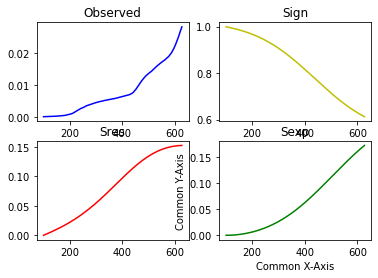

In [77]:
R0_pa1 = Philippines / 84167090
I0_pa1 = 0.001431 - R0_pa1
S0_pa1 = 1 - I0_pa1 - R0_pa1
S0res11 = 0
#S0exh23 = 1-S0_aa3-S0res23-I0_aa3-R0_aa3
print ("I(A3): ", I0_pa1)
print ("R(A3): ", R0_pa1)
print ("Sign(A3): ", S0_pa1)
print ("Sres(A3): ", S0res11)
#print ("Sexh(A3): ", S0exh23)
def deriv(yp1,t,b, a_p1,k2,k3,k6):
    #Signa3,Sresa3,Sexha3,Ia3,Ra3 = ya3
    S0_pa1,S0res11,I0_pa1,R0_pa1 = yp1

    Sexhp1 = 1 -yp1[0]-yp1[1]-yp1[2]-yp1[3]
    dSigndt = -(a_p1*yp1[0]*yp1[2])-(k2*yp1[0]*yp1[2])+(k6*Sexhp1)
    dIdt = (a_p1*yp1[0]*yp1[2])+(a_p1*Sexhp1*yp1[2])-(b*yp1[2])
    dRdt = b*yp1[2]
    dSresdt = (k2*yp1[0]*(yp1[2]))-(k3*yp1[1])
    #dSexhdt = (k3*S0res23)-(a_a3*S0exh23*ia3)-(k6*S0exh23)
    return [dSigndt, dSresdt, dIdt,dRdt]
t = np.linspace(0, 180, 527)
x_initial = S0_pa1,S0res11,I0_pa1, R0_pa1
solp1 = odeint(deriv, x_initial, t, args=(b, a_p1,k2,k3,k6))
Signp1,Sresp1,Ip1,Rp1 = solp1.T
dp11 = pd.DataFrame(Signp1)
dp12 = pd.DataFrame(Sresp1)
dp14 = pd.DataFrame(Ip1)
dp15 = pd.DataFrame(Rp1)
Philippines_w1 = pd.concat([dp11, dp12,dp14,dp15], axis=1)
Philippines_w1.columns = ['Sign','Sres','I','R']
Philippines_w1
figure, axes = plt.subplots(nrows=2, ncols=2)

axes[0, 0].plot(Cumulative_cases_3C['Days'], Cumulative_cases_3C['Philippines_CC'],color='b')

axes[0, 1].plot(Cumulative_cases_3C['Days'], Signp1,color='y')
axes[1, 0].plot(Cumulative_cases_3C['Days'], Sresp1,color='r')
axes[1, 1].plot(Cumulative_cases_3C['Days'],1 -Signp1-Sresp1-Ip1-Rp1,color='g')
plt.xlabel("Common X-Axis")
plt.ylabel("Common Y-Axis")
axes[0, 0].title.set_text("Observed")
axes[0, 1].title.set_text("Sign")
axes[1, 0].title.set_text("Sres")
axes[1, 1].title.set_text("Sexp")


I(A3):  0.0013224756806965764
R(A3):  0.0008735243193034237
Sign(A3):  0.997804
Sres(A3):  0


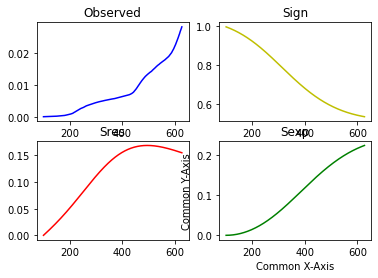

In [78]:
R0_pa2 = Philippines / 84167090
I0_pa2 = 0.002196 - R0_pa2
S0_pa2 = 1 - I0_pa2 - R0_pa2
S0res12 = 0
#S0exh23 = 1-S0_aa3-S0res23-I0_aa3-R0_aa3
print ("I(A3): ", I0_pa2)
print ("R(A3): ", R0_pa2)
print ("Sign(A3): ", S0_pa2)
print ("Sres(A3): ", S0res12)
#print ("Sexh(A3): ", S0exh23)
def deriv(yp2,t,b, a_p2,k2,k3,k6):
    #Signa3,Sresa3,Sexha3,Ia3,Ra3 = ya3
    S0_pa2,S0res12,I0_pa2,R0_pa2 = yp2

    Sexhp2 = 1 -yp2[0]-yp2[1]-yp2[2]-yp2[3]
    dSigndt = -(a_p2*yp2[0]*yp2[2])-(k2*yp2[0]*yp2[2])+(k6*Sexhp2)
    dIdt = (a_p2*yp2[0]*yp2[2])+(a_p2*Sexhp2*yp2[2])-(b*yp2[2])
    dRdt = b*yp2[2]
    dSresdt = (k2*yp2[0]*(yp2[2]))-(k3*yp2[1])
    #dSexhdt = (k3*S0res23)-(a_a3*S0exh23*ia3)-(k6*S0exh23)
    return [dSigndt, dSresdt, dIdt,dRdt]
t = np.linspace(0, 180, 527)
x_initial = S0_pa2,S0res12,I0_pa2, R0_pa2
solp2 = odeint(deriv, x_initial, t, args=(b, a_p2,k2,k3,k6))
Signp2,Sresp2,Ip2,Rp2 = solp2.T
dp21 = pd.DataFrame(Signp2)
dp22 = pd.DataFrame(Sresp2)
dp24 = pd.DataFrame(Ip2)
dp25 = pd.DataFrame(Rp2)
Philippines_w2 = pd.concat([dp21, dp22,dp24,dp25], axis=1)
Philippines_w2.columns = ['Sign','Sres','I','R']
Philippines_w2
figure, axes = plt.subplots(nrows=2, ncols=2)

axes[0, 0].plot(Cumulative_cases_3C['Days'], Cumulative_cases_3C['Philippines_CC'],color='b')

axes[0, 1].plot(Cumulative_cases_3C['Days'], Signp2,color='y')
axes[1, 0].plot(Cumulative_cases_3C['Days'], Sresp2,color='r')
axes[1, 1].plot(Cumulative_cases_3C['Days'],1 -Signp2-Sresp2-Ip2-Rp2,color='g')
plt.xlabel("Common X-Axis")
plt.ylabel("Common Y-Axis")
axes[0, 0].title.set_text("Observed")
axes[0, 1].title.set_text("Sign")
axes[1, 0].title.set_text("Sres")
axes[1, 1].title.set_text("Sexp")


I(A3):  0.0005574756806965762
R(A3):  0.0008735243193034237
Sign(A3):  0.998569
Sres(A3):  0


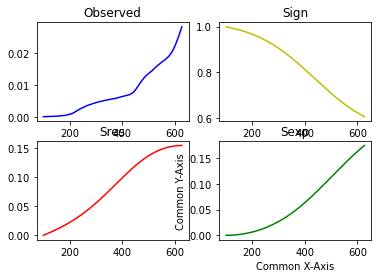

In [79]:
R0_pa3 = Philippines / 84167090
I0_pa3 = 0.001431 - R0_pa3
S0_pa3 = 1 - I0_pa3 - R0_pa3
S0res13 = 0
#S0exh23 = 1-S0_aa3-S0res23-I0_aa3-R0_aa3
print ("I(A3): ", I0_pa3)
print ("R(A3): ", R0_pa3)
print ("Sign(A3): ", S0_pa3)
print ("Sres(A3): ", S0res13)
#print ("Sexh(A3): ", S0exh23)
def deriv(yp3,t,b, a_p3,k2,k3,k6):
    #Signa3,Sresa3,Sexha3,Ia3,Ra3 = ya3
    S0_pa3,S0res13,I0_pa3,R0_pa3 = yp3

    Sexhp3 = 1 -yp3[0]-yp3[1]-yp3[2]-yp3[3]
    dSigndt = -(a_p3*yp3[0]*yp3[2])-(k2*yp3[0]*yp3[2])+(k6*Sexhp3)
    dIdt = (a_p3*yp3[0]*yp3[2])+(a_p3*Sexhp3*yp3[2])-(b*yp3[2])
    dRdt = b*yp3[2]
    dSresdt = (k2*yp3[0]*(yp3[2]))-(k3*yp3[1])
    #dSexhdt = (k3*S0res23)-(a_a3*S0exh23*ia3)-(k6*S0exh23)
    return [dSigndt, dSresdt, dIdt,dRdt]
t = np.linspace(0, 180, 527)
x_initial = S0_pa3,S0res13,I0_pa3, R0_pa3
solp3 = odeint(deriv, x_initial, t, args=(b, a_p3,k2,k3,k6))
Signp3,Sresp3,Ip3,Rp3 = solp3.T
dp31 = pd.DataFrame(Signp3)
dp32 = pd.DataFrame(Sresp3)
dp34 = pd.DataFrame(Ip3)
dp35 = pd.DataFrame(Rp3)
Philippines_w3 = pd.concat([dp31, dp32,dp34,dp35], axis=1)
Philippines_w3.columns = ['Sign','Sres','I','R']
Philippines_w3
figure, axes = plt.subplots(nrows=2, ncols=2)

axes[0, 0].plot(Cumulative_cases_3C['Days'], Cumulative_cases_3C['Philippines_CC'],color='b')

axes[0, 1].plot(Cumulative_cases_3C['Days'], Signp3,color='y')
axes[1, 0].plot(Cumulative_cases_3C['Days'], Sresp3,color='r')
axes[1, 1].plot(Cumulative_cases_3C['Days'],1 -Signp3-Sresp3-Ip3-Rp3,color='g')
plt.xlabel("Common X-Axis")
plt.ylabel("Common Y-Axis")
axes[0, 0].title.set_text("Observed")
axes[0, 1].title.set_text("Sign")
axes[1, 0].title.set_text("Sres")
axes[1, 1].title.set_text("Sexp")


I(A3):  6.430352770605641e-05
R(A3):  0.0001366964722939436
Sign(A3):  0.999799
Sres(A3):  0


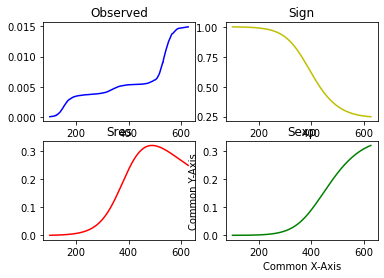

In [80]:
R0_aa1 = Afghanistan / 10351401
I0_aa1 = 0.000201 - R0_aa1
S0_aa1 = 1 - I0_aa1 - R0_aa1
S0res21 = 0
#S0exh23 = 1-S0_aa3-S0res23-I0_aa3-R0_aa3
print ("I(A3): ", I0_aa1)
print ("R(A3): ", R0_aa1)
print ("Sign(A3): ", S0_aa1)
print ("Sres(A3): ", S0res21)
#print ("Sexh(A3): ", S0exh23)
def deriv(ya1,t,b, a_a1,k2,k3,k6):
    #Signa3,Sresa3,Sexha3,Ia3,Ra3 = ya3
    S0_aa1,S0res21,I0_aa1,R0_aa1 = ya1

    Sexha1 = 1 -ya1[0]-ya1[1]-ya1[2]-ya1[3]
    dSigndt = -(a_a1*ya1[0]*ya1[2])-(k2*ya1[0]*ya1[2])+(k6*Sexha1)
    dIdt = (a_a1*ya1[0]*ya1[2])+(a_a1*Sexha1*ya1[2])-(b*ya1[2])
    dRdt = b*ya1[2]
    dSresdt = (k2*ya1[0]*(ya1[2]))-(k3*ya1[1])
    #dSexhdt = (k3*S0res23)-(a_a3*S0exh23*ia3)-(k6*S0exh23)
    return [dSigndt, dSresdt, dIdt,dRdt]
t = np.linspace(0, 180, 527)
x_initial = S0_aa1,S0res21,I0_aa1, R0_aa1
sola1 = odeint(deriv, x_initial, t, args=(b, a_a1,k2,k3,k6))
Signa1,Sresa1,Ia1,Ra1 = sola1.T
da11 = pd.DataFrame(Signa1)
da12 = pd.DataFrame(Sresa1)
da14 = pd.DataFrame(Ia1)
da15 = pd.DataFrame(Ra1)
Afghanisthan_w1 = pd.concat([da11, da12,da14,da15], axis=1)
Afghanisthan_w1.columns = ['Sign','Sres','I','R']
Afghanisthan_w1
figure, axes = plt.subplots(nrows=2, ncols=2)

axes[0, 0].plot(Cumulative_cases_3C['Days'], Cumulative_cases_3C['Afghanistan_CC'],color='b')

axes[0, 1].plot(Cumulative_cases_3C['Days'], Signa1,color='y')
axes[1, 0].plot(Cumulative_cases_3C['Days'], Sresa1,color='r')
axes[1, 1].plot(Cumulative_cases_3C['Days'],1 -Signa1-Sresa1-Ia1-Ra1,color='g')
plt.xlabel("Common X-Axis")
plt.ylabel("Common Y-Axis")
axes[0, 0].title.set_text("Observed")
axes[0, 1].title.set_text("Sign")
axes[1, 0].title.set_text("Sres")
axes[1, 1].title.set_text("Sexp")


I(A3):  0.0001133035277060564
R(A3):  0.0001366964722939436
Sign(A3):  0.9997499999999999
Sres(A3):  0


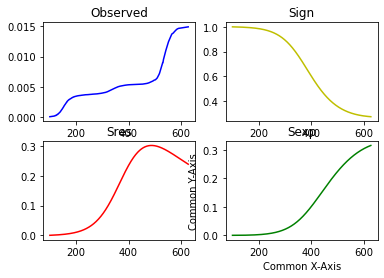

In [81]:
R0_aa2 = Afghanistan / 10351401
I0_aa2 = 0.000250 - R0_aa2
S0_aa2 = 1 - I0_aa2 - R0_aa2
S0res22 = 0
#S0exh23 = 1-S0_aa3-S0res23-I0_aa3-R0_aa3
print ("I(A3): ", I0_aa2)
print ("R(A3): ", R0_aa2)
print ("Sign(A3): ", S0_aa2)
print ("Sres(A3): ", S0res22)
#print ("Sexh(A3): ", S0exh23)

def deriv(ya2,t,b, a_a2,k2,k3,k6):
    #Signa3,Sresa3,Sexha3,Ia3,Ra3 = ya3
    S0_aa2,S0res22,I0_aa2,R0_aa2 = ya2

    Sexha2 = 1 -ya2[0]-ya2[1]-ya2[2]-ya2[3]
    dSigndt = -(a_a2*ya2[0]*ya2[2])-(k2*ya2[0]*ya2[2])+(k6*Sexha2)
    dIdt = (a_a2*ya2[0]*ya2[2])+(a_a2*Sexha2*ya2[2])-(b*ya2[2])
    dRdt = b*ya2[2]
    dSresdt = (k2*ya2[0]*(ya2[2]))-(k3*ya2[1])
    #dSexhdt = (k3*S0res23)-(a_a3*S0exh23*ia3)-(k6*S0exh23)
    return [dSigndt, dSresdt, dIdt,dRdt]
t = np.linspace(0, 180, 527)
x_initial = S0_aa2,S0res22,I0_aa2, R0_aa2
sola2 = odeint(deriv, x_initial, t, args=(b, a_a2,k2,k3,k6))
Signa2,Sresa2,Ia2,Ra2 = sola2.T
da21 = pd.DataFrame(Signa2)
da22 = pd.DataFrame(Sresa2)
da24 = pd.DataFrame(Ia2)
da25 = pd.DataFrame(Ra2)
Afghanisthan_w2 = pd.concat([da21, da22,da24,da25], axis=1)
Afghanisthan_w2.columns = ['Sign','Sres','I','R']
Afghanisthan_w2
figure, axes = plt.subplots(nrows=2, ncols=2)

axes[0, 0].plot(Cumulative_cases_3C['Days'], Cumulative_cases_3C['Afghanistan_CC'],color='b')

axes[0, 1].plot(Cumulative_cases_3C['Days'], Signa2,color='y')
axes[1, 0].plot(Cumulative_cases_3C['Days'], Sresa2,color='r')
axes[1, 1].plot(Cumulative_cases_3C['Days'],1 -Signa2-Sresa2-Ia2-Ra2,color='g')
plt.xlabel("Common X-Axis")
plt.ylabel("Common Y-Axis")
axes[0, 0].title.set_text("Observed")
axes[0, 1].title.set_text("Sign")
axes[1, 0].title.set_text("Sres")
axes[1, 1].title.set_text("Sexp")


I(A3):  6.430352770605641e-05
R(A3):  0.0001366964722939436
Sign(A3):  0.999799
Sres(A3):  0


Text(0, 0.5, 'Infected People')

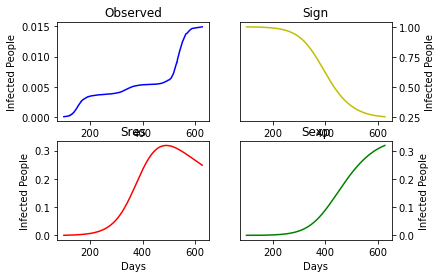

In [94]:
R0_aa3 = Afghanistan / 10351401
I0_aa3 = 0.000201 - R0_aa3
S0_aa3 = 1 - I0_aa3 - R0_aa3
S0res23 = 0
#S0exh23 = 1-S0_aa3-S0res23-I0_aa3-R0_aa3
print ("I(A3): ", I0_aa3)
print ("R(A3): ", R0_aa3)
print ("Sign(A3): ", S0_aa3)
print ("Sres(A3): ", S0res23)
#print ("Sexh(A3): ", S0exh23)
def deriv(ya3,t,b, a_a3,k2,k3,k6):
    #Signa3,Sresa3,Sexha3,Ia3,Ra3 = ya3
    S0_aa3,S0res23,I0_aa3,R0_aa3 = ya3

    Sexha3 = 1 -ya3[0]-ya3[1]-ya3[2]-ya3[3]
    dSigndt = -(a_a3*ya3[0]*ya3[2])-(k2*ya3[0]*ya3[2])+(k6*Sexha3)
    dIdt = (a_a3*ya3[0]*ya3[2])+(a_a3*Sexha3*ya3[2])-(b*ya3[2])
    dRdt = b*ya3[2]
    dSresdt = (k2*ya3[0]*(ya3[2]))-(k3*ya3[1])
    #dSexhdt = (k3*S0res23)-(a_a3*S0exh23*ia3)-(k6*S0exh23)
    return [dSigndt, dSresdt, dIdt,dRdt]
t = np.linspace(0, 180, 527)
x_initial = S0_aa3,S0res23,I0_aa3, R0_aa3
sola3 = odeint(deriv, x_initial, t, args=(b, a_a3,k2,k3,k6))
Signa3,Sresa3,Ia3,Ra3 = sola3.T
da31 = pd.DataFrame(Signa3)
da32 = pd.DataFrame(Sresa3)
da34 = pd.DataFrame(Ia3)
da35 = pd.DataFrame(Ra3)
Afghanisthan_w3 = pd.concat([da31, da32,da34,da35], axis=1)
Afghanisthan_w3.columns = ['Sign','Sres','I','R']

Afghanisthan_w3
figure, axes = plt.subplots(nrows=2, ncols=2)
axes[0, 0].plot(Cumulative_cases_3C['Days'], Cumulative_cases_3C['Afghanistan_CC'],color='b')
axes[0, 1].plot(Cumulative_cases_3C['Days'], Signa3,color='y')
axes[1, 0].plot(Cumulative_cases_3C['Days'], Sresa3,color='r')
axes[1, 1].plot(Cumulative_cases_3C['Days'],1-Signa3-Sresa3-Ia3-Ra3,color='g')

axes[0, 0].title.set_text("Observed")
axes[0, 1].title.set_text("Sign")
axes[1, 0].title.set_text("Sres")
axes[1, 1].title.set_text("Sexp")
axes[0, 0].set_ylabel('Infected People')
axes[1, 0].set_ylabel('Infected People')
axes[1, 0].set_xlabel('Days')
axes[1, 1].set_xlabel('Days')
axes[0, 1].yaxis.set_label_position("right")
axes[0, 1].yaxis.tick_right()
axes[0, 1].set_ylabel('Infected People')
axes[1, 1].yaxis.set_label_position("right")
axes[1, 1].yaxis.tick_right()
axes[1, 1].set_ylabel('Infected People')